# Notebook 3 : Apprentissage non-supervisé

Notebook préparé par [Chloé-Agathe Azencott](http://cazencott.info).

Dans ce notebook il s'agit d'explorer plusieurs techniques de réduction de dimension et de clustering.

In [5]:
# charger numpy as np, matplotlib as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

In [7]:
import pandas as pd

## 1. Analyse en composantes principales

Dans cette section, nous allons effectuer une analyse en composantes principales d'un jeu de données décrivant les scores obtenus par les meilleurs athlètes ayant participé en 2004 à une épreuve de décathlon, aux Jeux Olympiques d'Athènes ou au Décastar de Talence.

### Chargement des données

Les données sont contenues dans le fichier `decathlon.txt`.

Le fichier contient 42 lignes et 13 colonnes.

La première ligne est un en-tête qui décrit les contenus des colonnes.

Les lignes suivantes décrivent les 41 athlètes.

Les 10 premières colonnes contiennent les scores obtenus aux différentes épreuves.
La 11ème colonne contient le classement.
La 12ème colonne contient le nombre de points obtenus.
La 13ème colonne contient une variable qualitative qui précise l'épreuve (JO ou Décastar) concernée.

Nous allons examiner ces données en commençant avec la librairie `pandas`.

In [4]:
my_data = pd.read_csv('data/decathlon.txt', sep="\t")  # lire les données dans un dataframe

FileNotFoundError: [Errno 2] No such file or directory: 'data/decathlon.txt'

__Alternativement :__ Si vous avez besoin de télécharger le fichier (par exemple sur colab) décommentez les deux lignes suivantes :

In [8]:
!wget https://raw.githubusercontent.com/CBIO-mines/fml-dassault-systems/main/data/decathlon.txt

my_data = pd.read_csv('decathlon.txt', sep="\t")

--2026-02-05 09:08:20--  https://raw.githubusercontent.com/CBIO-mines/fml-dassault-systems/main/data/decathlon.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3579 (3.5K) [text/plain]
Saving to: ‘decathlon.txt’

decathlon.txt       100%[===================>]   3.50K  --.-KB/s    in 0s      

2026-02-05 09:08:20 (43.7 MB/s) - ‘decathlon.txt’ saved [3579/3579]



In [9]:
my_data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


### Visualisation

Une __matrice de nuages de points__ est une visualisation en k x k panneaux des relations deux à deux entre k variables :
* sur la diagonale, l'histogramme pour chacune des variables
* hors diagonale, les nuages de points entre deux variables (non standardisées).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

A vous d'afficher la visualisation à l'aide de la fonction `scatter_matrix` :

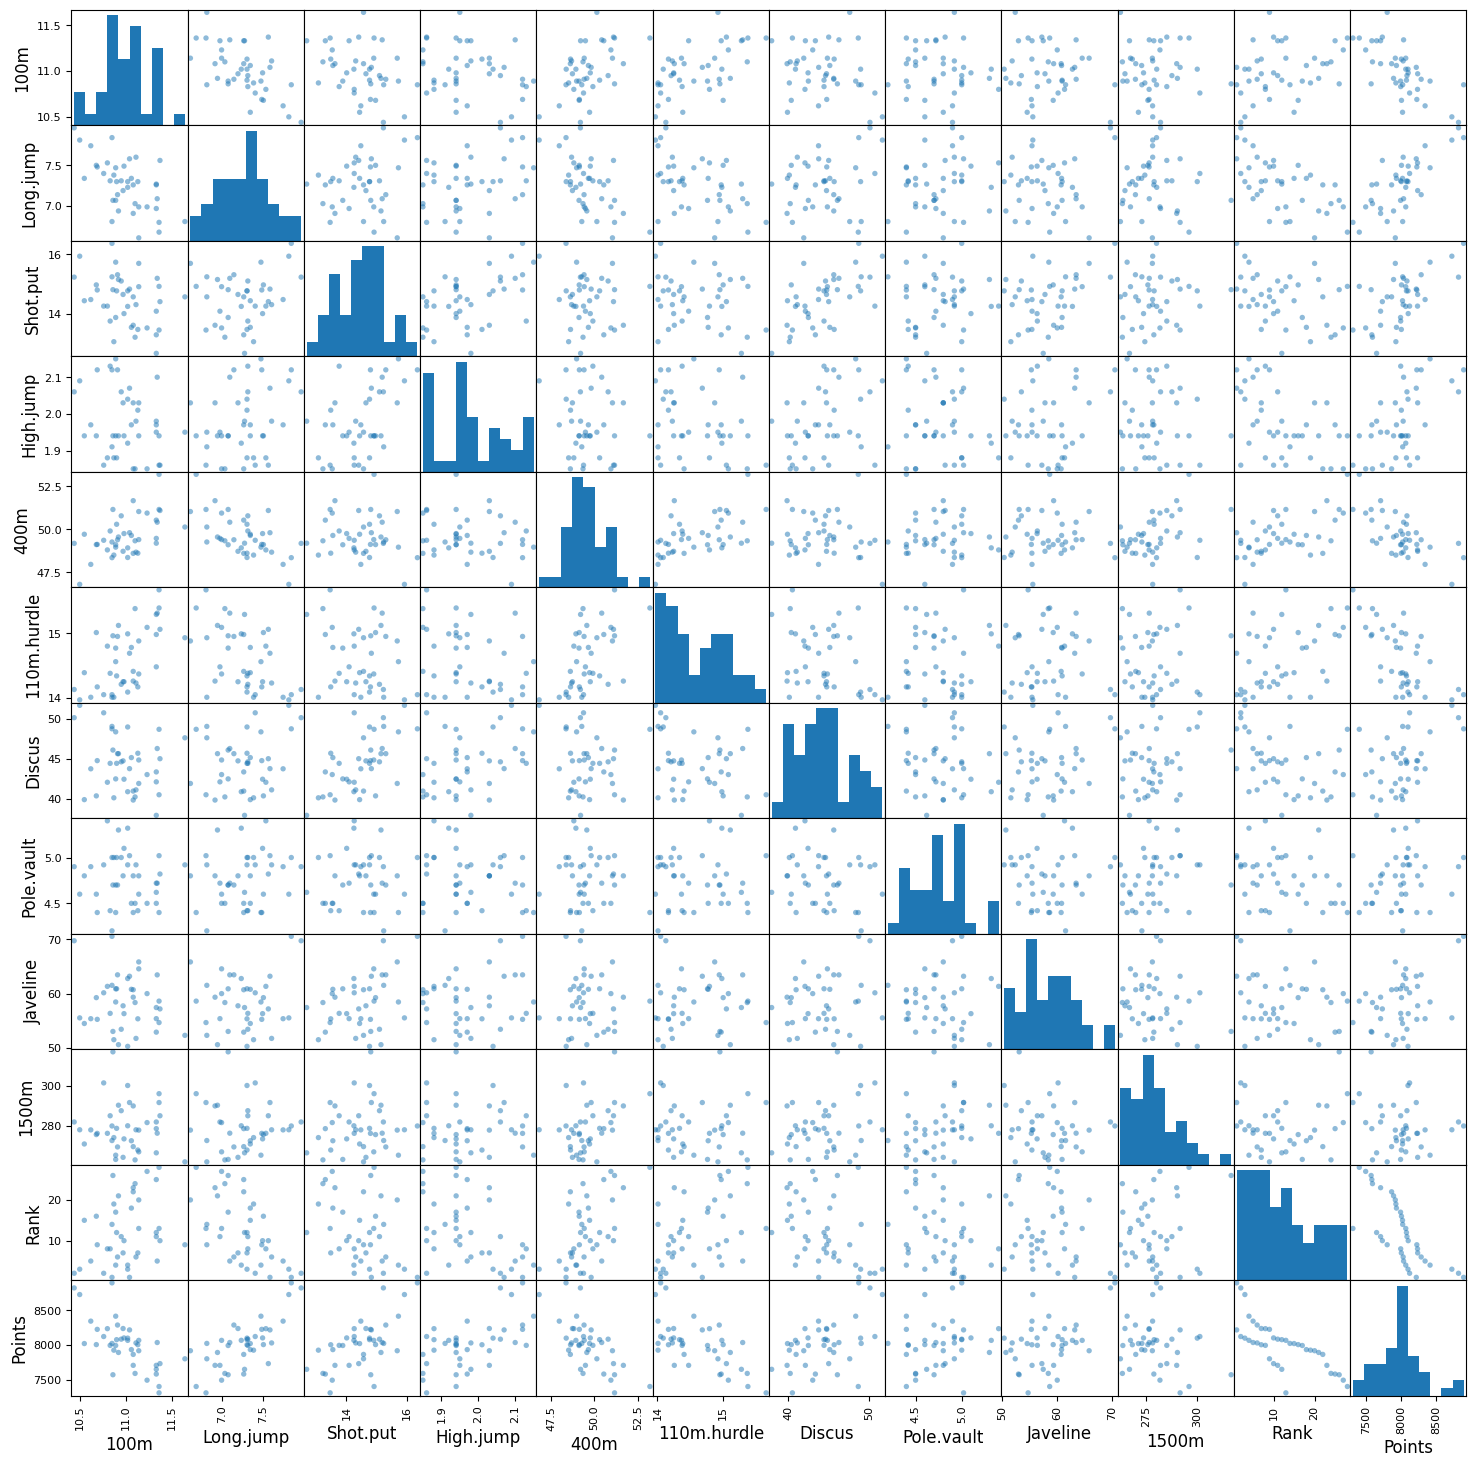

In [10]:
from pandas.plotting import scatter_matrix

### DEBUT DE VOTRE CODE
scatter_matrix(my_data, s=60, figsize=(18, 18));
### FIN DE VOTRE CODE

Vous pouvez aussi limiter la visualisation à quelques variables, pour des observations plus claires. Affichez la scatter_matrix pour les 3 ou 4 variables qui vous semblent les plus corrélées par exemple :

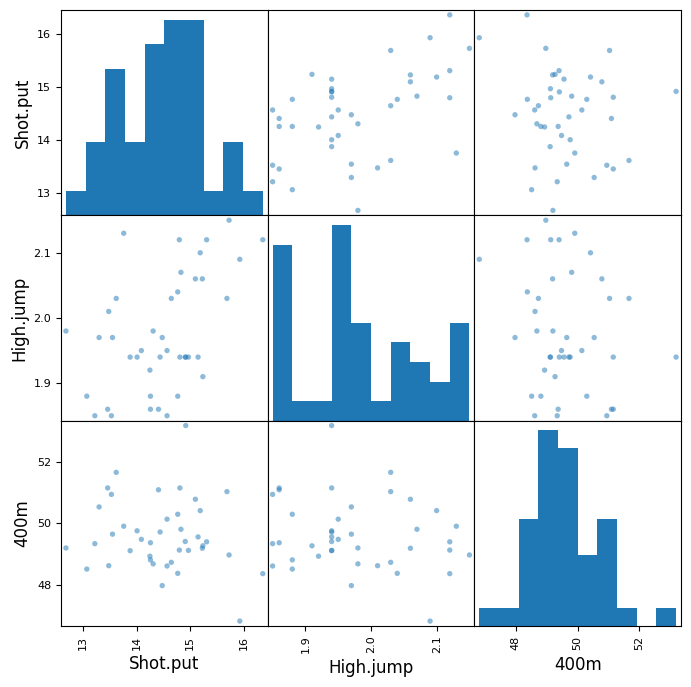

In [11]:
### DEBUT DE VOTRE CODE
scatter_matrix(my_data[['Shot.put', 'High.jump', '400m']],
               alpha=0.5, s=60, figsize=(8, 8));
### FIN DE VOTRE CODE

Alternativement, la librairie `seaborn` permet des visualisations plus élaborées que `matplotlib`. Vous pouvez par exemple explorer les capacités de `jointplot`.
https://seaborn.pydata.org/generated/seaborn.jointplot.html

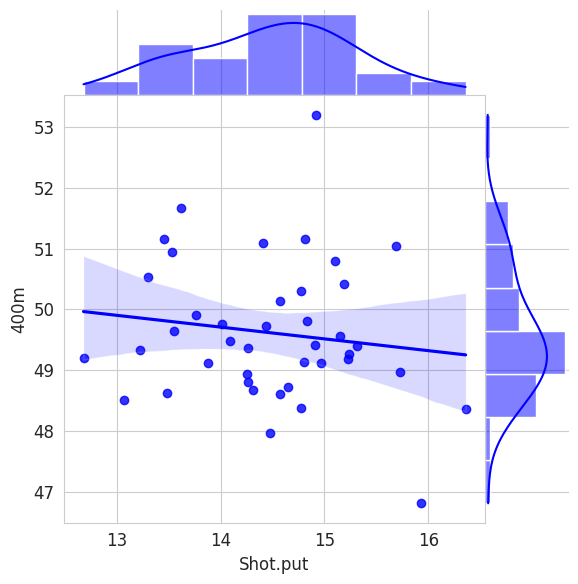

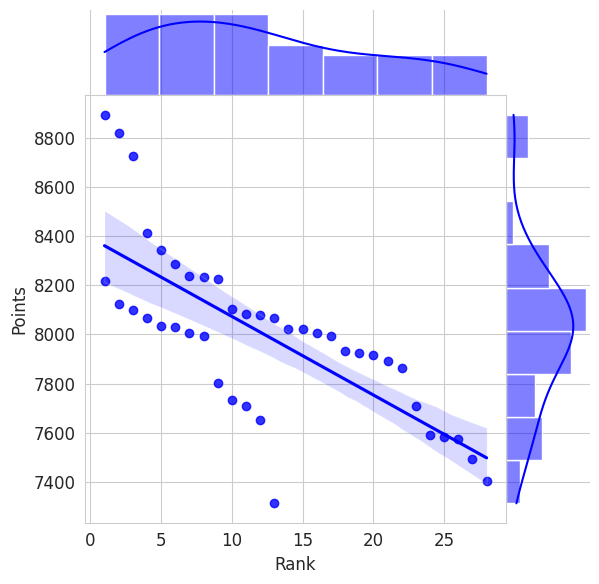

In [12]:
import seaborn as sns
sns.set_style('whitegrid')

sns.jointplot(x='Shot.put', y='400m', data = my_data,
              kind='reg', height=6, space=0, color='b')

sns.jointplot(x='Rank', y='Points', data = my_data,
              kind='reg', height=6, space=0, color='b');

Nous allons maintenant effectuer une analyse en composantes principales des scores aux 10 épreuves.

Commençons par extraire les variables prédictives :

In [13]:
X = np.array(my_data.drop(columns=['Points', 'Rank', 'Competition']))
print(X.shape)

(41, 10)


### Standardisation des données

Après visualisation des données, on peut remarquer des échelles et des distributions de données différentes selon les variables.
On réapplique donc ici la procédure vue dans les TPs précédents pour standardiser nos données :  nous avons besoin d'un objet `StandardScaler` contenu dans le module `preprocessing` de `sklearn`

In [14]:
### DEBUT DE VOTRE CODE
# Import du module
from sklearn import preprocessing

In [15]:
# Creation de l'objet StandardScaler
std_scaler = preprocessing.StandardScaler()

# Ajustement de l'objet sur les données
std_scaler.fit(X)

# Transformation des données
X_scaled = std_scaler.transform(X)

### FIN DE VOTRE CODE

print(X_scaled.shape)

(41, 10)


### Calcul des composantes principales

Les algorithmes de factorisation de matrice de `scikit-learn` sont inclus dans le module `decomposition`. Pour  l'ACP, référez-vous à :
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [16]:
from sklearn import decomposition

Remarque : Nous avons ici peu de variables et pouvons nous permettre de calculer toutes les PC.

La plupart des algorithmes implémentés dans `scikit-learn` suivent le fonctionnement suivant :
* on instancie un objet, correspondant à un type d'algorithme/modèle, avec ses hyperparamètres (ici le nombre de composantes)
* on utilise la méthode `fit` pour passer les données à cet algorithme
* les paramètres appris sont maintenant accessibles comme arguments de cet objet.

In [17]:
# Instanciation d'un objet PCA pour 10 composantes principales

### DEBUT DE VOTRE CODE
pca = decomposition.PCA(n_components=10)

In [18]:
# On passe maintenant les données standardisées à cet objet
# C'est ici que se font les calculs
pca.fit(X_scaled)

### FIN DE VOTRE CODE

PCA(n_components=10)

### Proportion de variance expliquée par les PCs

Nous allons maintenant afficher la proportion de variance expliquée par les différentes composantes. Il est accessible dans le paramètre `explained_variance_ratio_` de notre objet `pca`.

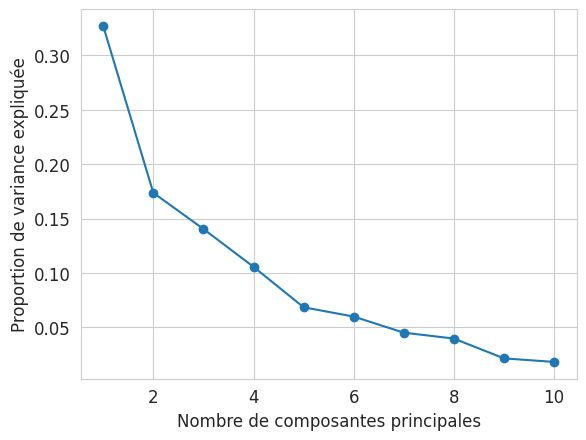

In [19]:
plt.plot(np.arange(1, 11), pca.explained_variance_ratio_, marker='o')

plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de variance expliquée")
plt.show()

Nous pouvons aussi afficher la proportion *cumulative* de variance expliquée, avec la fonction [`cumsum`](https://numpy.org/doc/2.1/reference/generated/numpy.cumsum.html) de `numpy` (importé plus haut sous l'alias `np`)

Affichez sur un graphique similaire à celui ci-dessus, la proportion cumulative de variance expliquée en fonction du nombre de composantes principales considérées

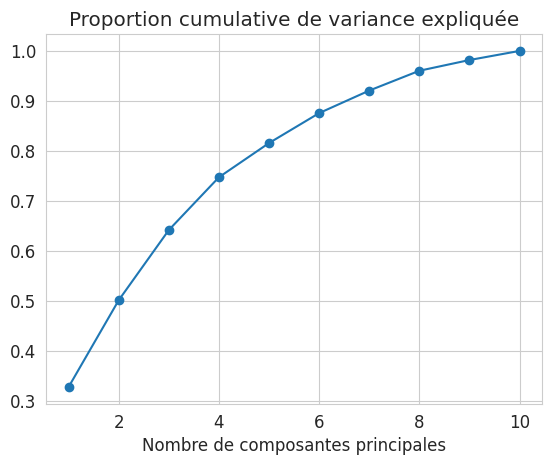

In [20]:
### DEBUT DE VOTRE CODE
plt.plot(np.arange(1, 11), np.cumsum(pca.explained_variance_ratio_), marker='o')

plt.xlabel("Nombre de composantes principales")
plt.title("Proportion cumulative de variance expliquée")
plt.show()
### FIN DE VOTRE CODE

__Questions :__
* Quelle est la proportion de variance expliquée par les deux premières composantes ?
* Combien de composantes faudrait-il utiliser pour expliquer 80% de la variance des données ?

### Projection des données sur les deux premières composantes principales

Nous allons maintenant utiliser uniquement les deux premières composantes principales.

Commençons par calculer la nouvelle représentation des données, c'est-à-dire leur projection sur ces deux PC.

In [21]:
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

(41, 10)


On peut afficher un nuage de points représentant les données selon ces deux PC.

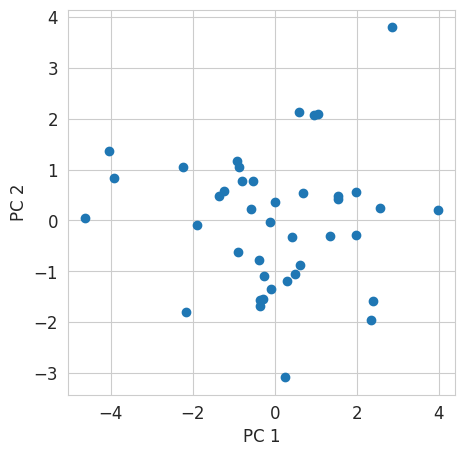

In [22]:
fig = plt.figure(figsize=(5, 5))

plt.scatter(X_projected[:, 0], X_projected[:, 1])

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

On peut maintenant colorer chaque point du nuage de points ci-dessus en fonction du classement de l'athlète qu'il représente.

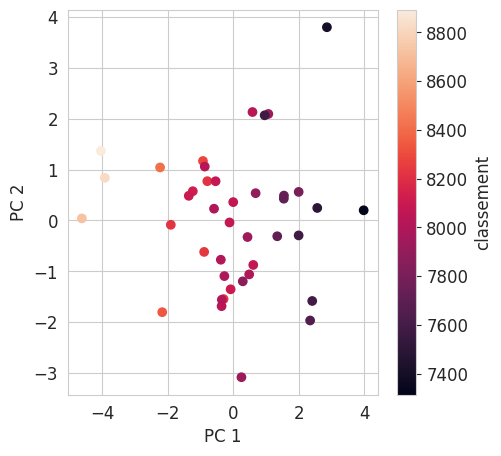

In [26]:
fig = plt.figure(figsize=(5, 5))

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=my_data['Points'])

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='classement')
plt.show()

__Question :__ Qu'en conclure sur l'interprétation de la PC1 ?

### Interprétation des deux premières composantes principales
Chaque composante principale est une combinaison linéaire des variables décrivant les données. Les poids de cette combinaison linéaire sont accesibles dans `pca.components_`.

Nous pouvons maintenant visualiser non pas les individus comme ci-dessus, mais les 10 variables dans l'espace des 2 composantes principales.

In [27]:
pcs = pca.components_
print(pcs[0])

[ 0.42829627 -0.41015201 -0.34414444 -0.31619436  0.3757157   0.41255442
 -0.30542571 -0.02783081 -0.15319802  0.03210733]


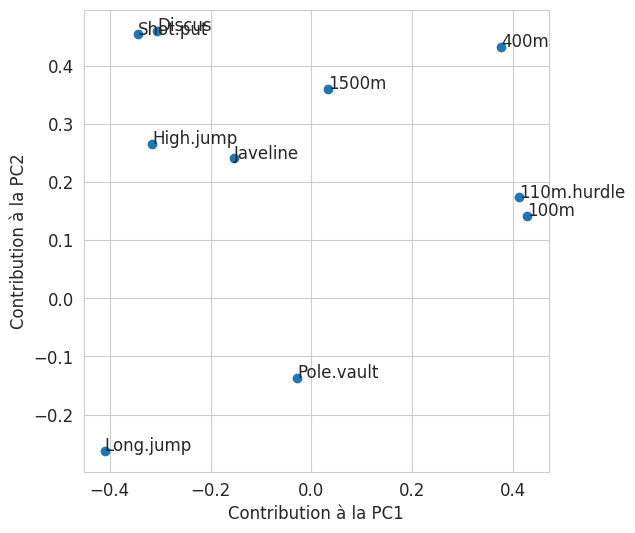

In [28]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(pcs[0], pcs[1])
for (x_coordinate, y_coordinate, feature_name) in zip(pcs[0], pcs[1], my_data.columns[:10]):
    plt.text(x_coordinate, y_coordinate, feature_name)

plt.xlabel("Contribution à la PC1")
plt.ylabel("Contribution à la PC2")
plt.show()

__Question :__ Quelles variables ont des contributions très similaires aux deux composantes principales ? Qu'en déduire sur leur similarité ?

__Question :__ Comment interpréter le signe des contributions des variables à la première composantes principales ?

## 2. Données « Olivetti »

Nous allons maintenant utiliser la réduction de dimension pour représenter en deux dimensions un jeu de données contenant des visages. Il s'agit d'un jeu de données classique, contenant 400 photos de 64 par 64 pixels. Il s'agit de photos des visages de 40 personnes différentes (10 photos par personne), étiquetées par un numéro de classe entre 0 et 39 identifiant la personne.

Nous pouvons charger ce jeu de données directement grâce à scikit-learn :

In [29]:
from sklearn import datasets

In [30]:
data = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


__Si vous n'arrivez pas à télécharger les données :__
* Aller sur : https://github.com/CroncLee/PCA-face-recognition/blob/master/olivetti_py3.pkz
* Télécharger le fichier (bouton Download)
utiliser la commande
```
    data = datasets.fetch_olivetti_faces(data_home="<PATH TO DATA>")
```
En remplaçant <PATH TO DATA> par le chemin vers le dossier où vous avez enregistré les données.

In [31]:
X = data.data
y = data.target

In [32]:
print(X.shape)

(400, 4096)


In [53]:
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [33]:
print("Les données contiennent %d classes" % len(np.unique(y)))

Les données contiennent 40 classes


Chaque image est représentée par une valeur (niveau de gris) pour chacun de ses pixels.

Nous pouvons visualiser ces images à condition de réorganiser ces valeurs (= un vecteur de longueur 4096) en matrices 64x64. Par exemple ci-dessous pour l'image à l'index 77 :

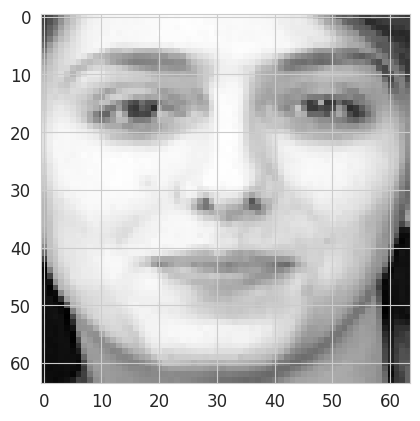

In [51]:
plt.imshow(X[77, :].reshape((64, 64)), interpolation='nearest', cmap=plt.cm.gray)

### PCA

Commençons par une analyse en composantes principales comme à la section précédente :

In [54]:
pca = decomposition.PCA(n_components=2)
X_transformed_pca = pca.fit_transform(X)

Chaque image est maintenant représentée par non pas 4096 variables, mais par deux variables. Nous pouvons les visualiser en nuage de point, et les colorer par classe :

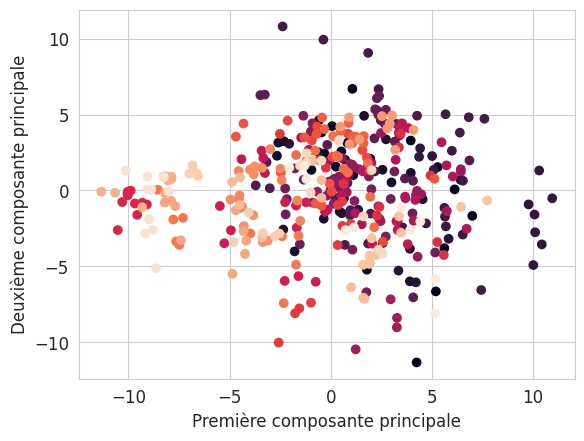

In [55]:
plt.scatter(X_transformed_pca[:, 0], X_transformed_pca[:, 1], c=y)
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.show()

__Question :__ les images du même visage (= de la même classe) ont-elles des représentations proches ?

Nous pouvons visualiser la contribution de chaque pixel à la première composante principale :

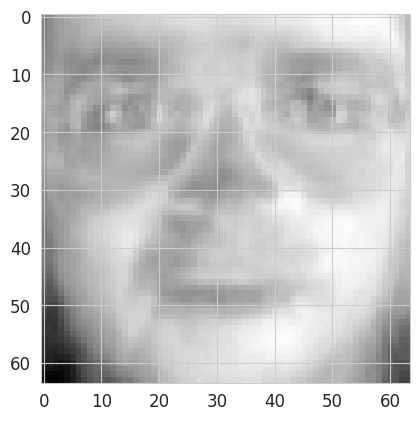

In [65]:
plt.imshow(pca.components_[0, :].reshape((64,64)), interpolation='nearest', cmap=plt.cm.gray);

Puis la contribution de chaque pixel à la deuxième composante principale :

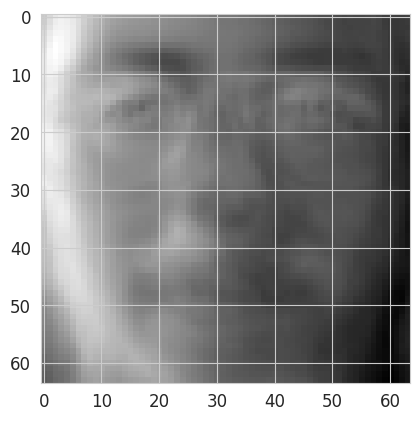

In [64]:
plt.imshow(pca.components_[1, :].reshape((64,64)), interpolation='nearest', cmap=plt.cm.gray);

**Question :** Quelle interprétation pouvons nous faire à partir de ces deux images représentant les contributions de chaque pixel sur les deux composantes principales ?

### tSNE

Essayons une autre méthode de réduction de la dimensionnalité pour tenter de mieux séparer nos classes

Nous allons maintenant utiliser la même démarche que pour la PCA, mais avec l'algorithme tSNE, grâce à la classe [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) du module `manifold`.

A vous :
- de créer l'objet `tsne` à partir de la classe citée ci-dessus. On veut ici ramener notre jeu de données en deux dimensions pour le visualiser
- d'intégrer les informations de notre jeu de données à cet objet
- de transformer nos données pour obtenir leurs nouvelles coordonnées en deux dimensions

In [66]:
from sklearn import manifold

In [67]:
### DEBUT DE VOTRE CODE
tsne = manifold.TSNE(n_components=2, init='random', learning_rate='auto')
X_transformed = tsne.fit_transform(X)
### FIN DE VOTRE CODE

Affichons le résultat de la réduction de dimensions avec tSNE :

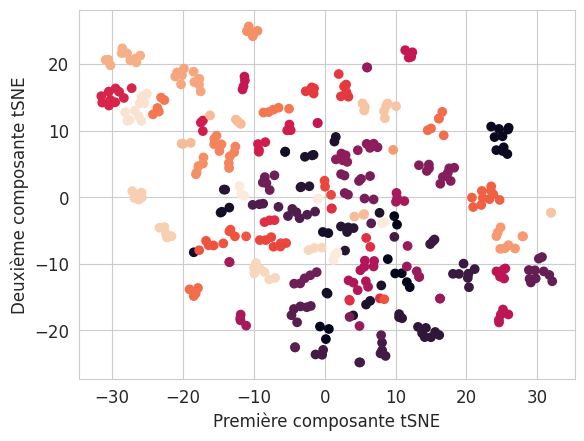

In [68]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.xlabel("Première composante tSNE")
plt.ylabel("Deuxième composante tSNE");

#### Influence du paramètre de perplexité

Le principal hyperparamètre influant sur la représentation obtenue par l'algorithme tSNE est le paramètre de perplexité. Celui-ci représente le nombre de voisins pour lesquels les distances sont préservées. Cela a donc une influence sur la conservation de la structure locale (perplexité faible) ou globale (perplexité élevée). La représentation obtenue peut varier très fortement en fonction de ce paramètre.

Testez différentes valeurs du paramètre de perplexité et affichez les résultats correspondants

In [69]:
### DEBUT DE VOTRE CODE
tsne_low_perp = manifold.TSNE(n_components=2, init='random', learning_rate='auto', perplexity=1)
X_transformed_low_perp = tsne_low_perp.fit_transform(X)
### FIN DE VOTRE CODE

Text(0.5, 1.0, 'tSNE (faible perplexité)')

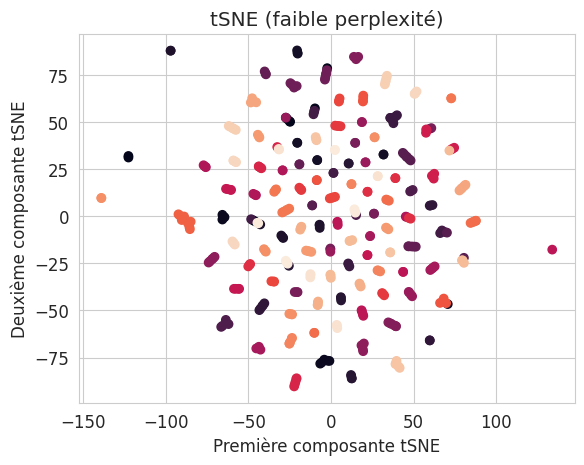

In [70]:
plt.scatter(X_transformed_low_perp[:, 0], X_transformed_low_perp[:, 1], c=y)
plt.xlabel("Première composante tSNE")
plt.ylabel("Deuxième composante tSNE")
plt.title("tSNE (faible perplexité)")

In [71]:
### DEBUT DE VOTRE CODE
tsne_high_perp = manifold.TSNE(n_components=2, init='random', learning_rate='auto', perplexity=100)
X_transformed_high_perp = tsne_high_perp.fit_transform(X)
### FIN DE VOTRE CODE

Text(0.5, 1.0, 'tSNE (perplexité élevée)')

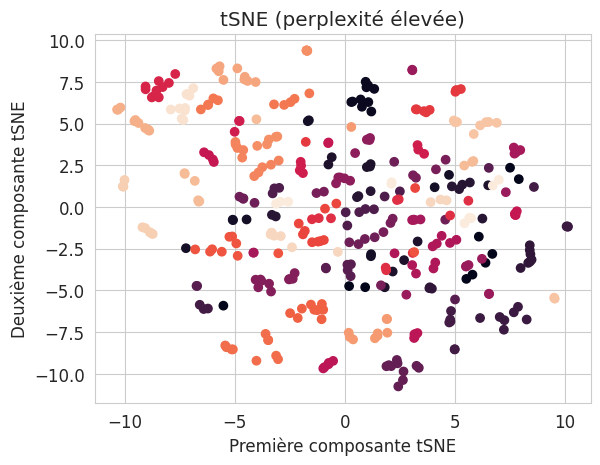

In [72]:
plt.scatter(X_transformed_high_perp[:, 0], X_transformed_high_perp[:, 1], c=y)
plt.xlabel("Première composante tSNE")
plt.ylabel("Deuxième composante tSNE")
plt.title("tSNE (perplexité élevée)")

## 3. Clustering

Générons trois jeux de données en deux dimensions:
- quatre clusters séparés issus de distributions normales
- deux demi-cercles imbriqués (ou "demi-lunes")
- deux cercles concentriques

In [73]:
from sklearn import datasets

In [74]:
# nombre de points
n_samples = 1000

# set random seed
np.random.seed(23)

four_blobs, four_blobs_labels = datasets.make_blobs(n_samples=n_samples, centers=4, n_features=2, random_state=170)

moons, moons_labels = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)

circles, circles_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=170)

Visualisons ces données :

Text(0.5, 1.0, 'Cercles')

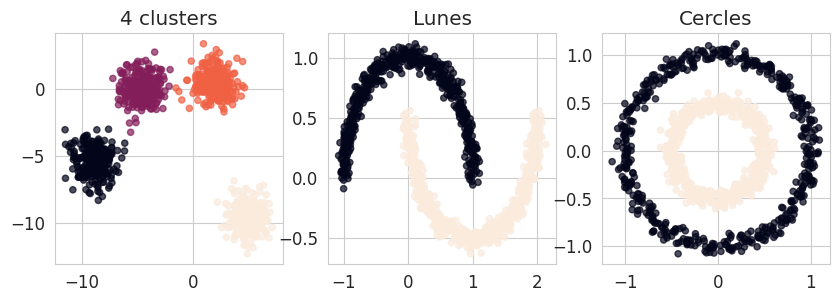

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].scatter(four_blobs[:, 0], four_blobs[:, 1], c=four_blobs_labels, s=20, alpha=0.7)
ax[1].scatter(moons[:, 0], moons[:, 1], c=moons_labels, s=20, alpha=0.7)
ax[2].scatter(circles[:, 0], circles[:, 1], c=circles_labels, s=20, alpha=0.7)

ax[0].set_title('4 clusters')
ax[1].set_title('Lunes')
ax[2].set_title('Cercles')

Supposons maintenant que nous ne disposons **pas** des étiquettes. Quels algorithmes de clustering permettent de retrouver les clusters correspondant respectivement aux quatre blobs, deux lunes et deux cercles ?

### Algorithme des k-moyennes

L'objectif de l'algorithme k-means est de retrouver $K$ clusters (et leur centroïde $\mu_k$) de manière à **minimiser la variance intra-cluster** :

\begin{align}
V = \sum_{k = 1}^{K} \sum_{x \in C_k} \frac{1}{|C_k|} (\|x - \mu_k\|^2)
\end{align}

**Implémentation à la main**

Nous allons commencer par implémenter l'algorithme "à la main", étape par étape, pour bien comprendre et visualiser ce que fait l'algorithme. Nous verrons ensuite comment utiliser directement l'implémentation du K-means dans la librairie `sklearn`. Les différentes étapes de l'algorithme sont :
1. Sélectionner un nombre `k` de clusters (hyperparamètre)
2. Initialiser aléatoirement les `k` centroïdes parmi nos points de données
3. Calculer les distances de tous les points à ces centroïdes
4. Assigner à chaque point le cluster du centroïde le plus proche
5. Calculer la position des nouveaux centroïdes
6. Répéter les étapes 3 à 5 jusqu'à convergence, c'est-à-dire jusqu'à ce que les centroïdes ne changent plus d'une itération à l'autre

Essayons donc cet algorithme sur le dataset des 4 blobs, en commençant par choisir `k` et en prenant `k` points au hasard dans notre dataset qui constitueront les centroïdes initiaux :

In [76]:
k = 4

random_indices = np.random.choice(len(four_blobs), k, replace=False)
centroids_step0 = four_blobs[random_indices]

for i, centroid in enumerate(centroids_step0):
    print(f"Centroïde {i} : x = {centroid[0]},\ty = {centroid[1]}")

Centroïde 0 : x = 3.5679755708830445,	y = -0.7411643083568404
Centroïde 1 : x = -4.58197076050192,	y = 0.1707016264777655
Centroïde 2 : x = -9.582073371322199,	y = -6.079460047487451
Centroïde 3 : x = -7.990366325280352,	y = -5.347131046114068


Visualisons les données avec ces centroïdes initiaux

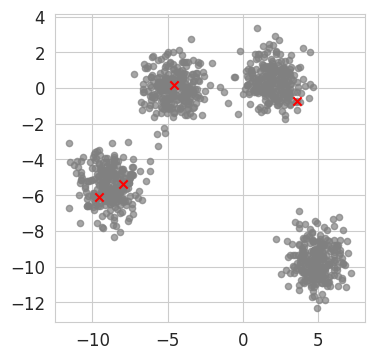

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(four_blobs[:, 0], four_blobs[:, 1], c='grey', s=20, alpha=0.7)
ax.scatter(centroids_step0[:, 0], centroids_step0[:, 1], c='red', marker='x')

plt.show()

Calculons maintenant les distances de chaque point de donnée à ces centroïdes

In [78]:
# Euclidean distance between data point and centroid
def compute_distance(data_point, centroid):
    dist = np.sqrt(np.sum((data_point - centroid)**2))
    return dist

def compute_all_distances(dataset, centroids):
    # Initialize distances array
    distances = np.zeros((k, n_samples))  # k and n_samples defined above

    # Calculate distance from each point to each centroid
    for i in range(k):
        for j in range(n_samples):
            distances[i, j] = compute_distance(dataset[j], centroids[i])

    return distances

In [79]:
distances = compute_all_distances(four_blobs, centroids_step0)

# Exemple de distance des 5 premiers points aux k centroïdes
print("Distances :")
print("\t\t", " \t\t".join([f"Point {i+1}" for i in range(5)]))
for i in range(k):
    print(f"Centroïde {i}\t", "\t".join(distances[i, :5].astype(str).tolist()))

Distances :
		 Point 1 		Point 2 		Point 3 		Point 4 		Point 5
Centroïde 0	 11.784247411011116	14.758813013069012	9.466528460382866	9.451368197501498	13.843809467072518
Centroïde 1	 5.758643667904218	8.776449714052207	14.254003753639761	13.797528285545447	7.706191288891633
Centroïde 2	 2.448740366311389	0.8050123894604602	15.465578634003116	14.741265477233672	0.34858815305556784
Centroïde 3	 0.7400184315424295	2.3987055841506097	14.158075744365863	13.461171066113893	1.4045646722216132


Nous devons maintenant assigner à chaque point le cluster correspondant au centroïde le plus proche. On utilise pour ça la fonction `argmin` de `numpy`. Cela constitue en quelques sortes nos étiquettes prédites de façon intermédiaire.

In [80]:
def assign_cluster(distances):
    assignments = np.argmin(distances, axis=0)
    return assignments

intermediate_labels = assign_cluster(distances)
print(intermediate_labels[:5])  # exemples d'étiquettes intermédiaires assignées aux points de données

[3 2 0 0 2]


On peut d'ailleurs vérifier que les labels intermédiaires assignés correspondent bien au centroïde le plus proche en comparant aux distances calculées plus haut.

Nous allons maintenant visualiser ces clusters intermédiaires et les centroïdes initiaux sur un scatter plot  

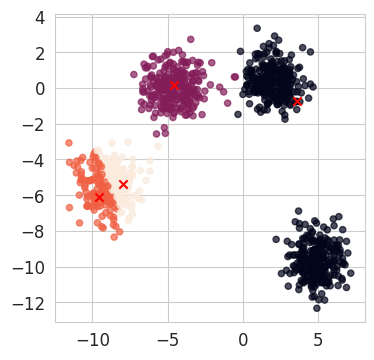

In [81]:
def visualise_kmeans(dataset, labels, centroids, ax):

    ax.scatter(dataset[:, 0], dataset[:, 1], c=labels, s=20, alpha=0.7)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
visualise_kmeans(four_blobs, intermediate_labels, centroids_step0, ax)
plt.show()


Il faut maintenant calculer la position des nouveaux centroïdes, que l'on va afficher sur le graphique

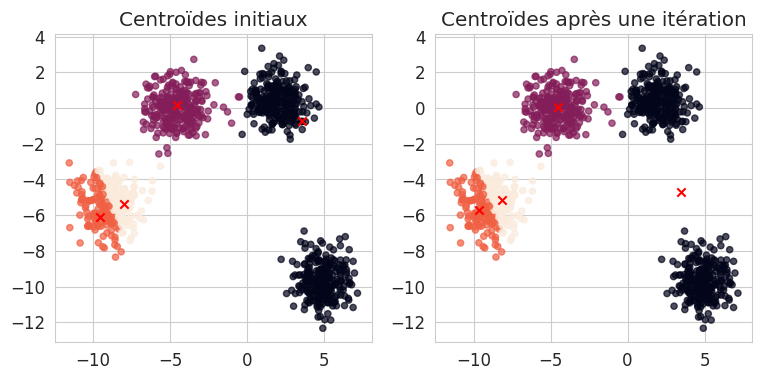

In [82]:
def compute_new_centroids(dataset, labels):
    centroids = np.zeros((k, dataset.shape[1]))

    for i in range(k):
        centroids[i] = dataset[labels == i].mean(axis=0)

    return centroids

centroids_step1 = compute_new_centroids(four_blobs, intermediate_labels)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
visualise_kmeans(four_blobs, intermediate_labels, centroids_step0, axes[0])
visualise_kmeans(four_blobs, intermediate_labels, centroids_step1, axes[1])

axes[0].set_title("Centroïdes initiaux")
axes[1].set_title("Centroïdes après une itération")

plt.show()

On recommence maintenant les différentes étapes : calcul de distance aux centroïdes, assignation des clusters aux points de données et calcul des nouveaux centroïdes

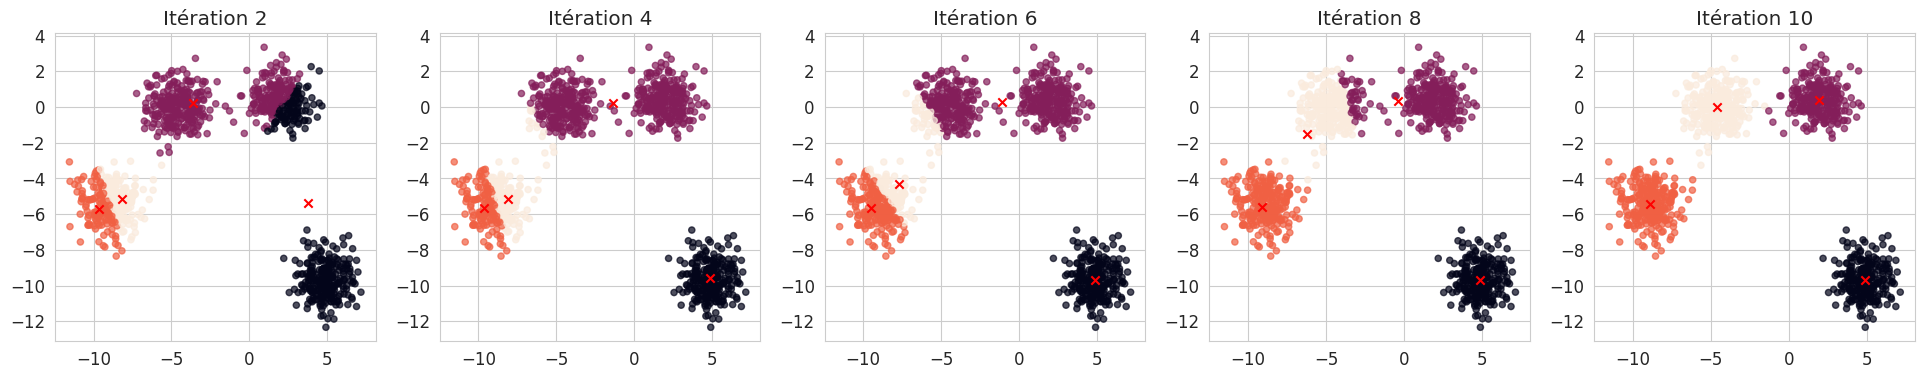

In [83]:
fig, axes = plt.subplots(1, 5, figsize=(24, 4))
n_iter = 10  # Nombre d'itérations de l'algorithme

current_fig = 0

centroids = centroids_step1
for i in range(n_iter):

    distances = compute_all_distances(four_blobs, centroids)
    intermediate_labels = assign_cluster(distances)

    # On affiche la visualisation toutes les 2 itérations
    if (i+1) % 2 == 0:
        visualise_kmeans(four_blobs, intermediate_labels, centroids, axes[current_fig])
        axes[current_fig].set_title(f"Itération {i+1}")
        current_fig += 1

    centroids = compute_new_centroids(four_blobs, intermediate_labels)

plt.show()


On voit bien ici comment, par itérations successives, l'algorithme est capable d'identifier correctement nos clusters, en déplaçant petit à petit les centroïdes et en réajustant l'appartenance de nos points de données.

**Question** : Dans quel(s) cas l'algorithme peut-il donner de mauvais résultats ?

**Implémentation avec `sklearn`**

Nous allons maintenant reprendre les 3 datasets créés plus haut (4 clusters, demi-lunes et cercles concentriques), et leur appliquer l'algorithme implémenté dans la librairie sklearn, qui reprend les étapes que nous venons de voir.

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [84]:
from sklearn import cluster

In [85]:
# DEBUT DE VOTRE CODE
# Initialisation de trois modèles k-means avec le nombre
# de clusters théoriquement attendu (resp. 4, 2 et 2):
kmeans_four_blobs = cluster.KMeans(n_clusters=4)
kmeans_moons = cluster.KMeans(n_clusters=2)
kmeans_circles = cluster.KMeans(n_clusters=2)

# Application aux données
kmeans_four_blobs.fit(four_blobs)
kmeans_moons.fit(moons)
kmeans_circles.fit(circles)
### FIN DE VOTRE CODE

KMeans(n_clusters=2)

L'attribut `.labels_` contient, pour chaque observation, le numéro du cluster auquel cette observation est assignée.

In [86]:
kmeans_four_blobs.labels_[0:10]

array([1, 1, 0, 0, 1, 2, 0, 3, 2, 0], dtype=int32)

Voyons maintenant à quoi ressemble le clustering obtenu pour nos trois datasets :

Text(0.5, 1.0, 'Cercles (k=2)')

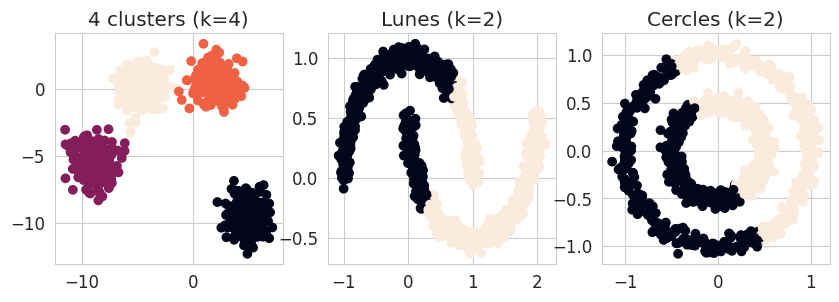

In [87]:
# Visualisation du clustering
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].scatter(four_blobs[:, 0], four_blobs[:, 1], c=kmeans_four_blobs.labels_)
ax[1].scatter(moons[:, 0], moons[:, 1], c=kmeans_moons.labels_)
ax[2].scatter(circles[:, 0], circles[:, 1], c=kmeans_circles.labels_)

ax[0].set_title('4 clusters (k=4)')
ax[1].set_title('Lunes (k=2)')
ax[2].set_title('Cercles (k=2)')

**Questions :** Est-ce le clustering espéré ? Dans quels cas l'algorithme des k-moyennes fonctionne-t-il correctement ? Pourquoi ne fonctionne-t-il pas dans les autres cas ?

#### Trouver $K$ avec le coefficient de silhouette

Souvent, le nombre de clusters exact, $K$, n'est pas connu à l'avance. Nous pouvons tout de même appliquer l'algorithme k-means et mesurer la performance du clustering pour trouver le meilleur paramètre $K$. L'une des métriques utilisées est le **coefficient de silhouette**.

Le coefficient (ou score) de silhouette permet de **comparer les distances moyennes intra- et inter-cluster** :

\begin{align}
\text{score} = \frac{b - a}{\max(a, b)}
\end{align}

avec $a$ la distance moyenne intra-cluster et $b$ la distance d'un point au cluster étranger le plus proche. Le score se calcule par observation (avec une valeur entre -1 et 1) puis la moyenne de ce score permet d'évaluer le clustering du nuage de point dans son ensemble.

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [88]:
from sklearn import metrics

In [89]:
print(f"4 clusters: Coefficient de silhouette pour le k-means (k=4) : %.2f" %
      metrics.silhouette_score(four_blobs, kmeans_four_blobs.labels_))
print(f"Lunes: Coefficient de silhouette pour le k-means (k=2) : %.2f" %
      metrics.silhouette_score(moons, kmeans_moons.labels_))
print(f"Cercles: Coefficient de silhouette pour le k-means (k=2) : %.2f" %
      metrics.silhouette_score(circles, kmeans_circles.labels_))


4 clusters: Coefficient de silhouette pour le k-means (k=4) : 0.76
Lunes: Coefficient de silhouette pour le k-means (k=2) : 0.49
Cercles: Coefficient de silhouette pour le k-means (k=2) : 0.35


Essayons d'évaluer la performance du clustering en fonction du nombre $K$ de clusters, en le faisant varier dans la fourchette [2, .., 8]

Dataset: 4 clusters
Coefficient de Silhouette optimal : 0.76
Nombre de clusters K correspondant: 4
Dataset: Lunes
Coefficient de Silhouette optimal : 0.53
Nombre de clusters K correspondant: 8
Dataset: Cercles
Coefficient de Silhouette optimal : 0.39
Nombre de clusters K correspondant: 3


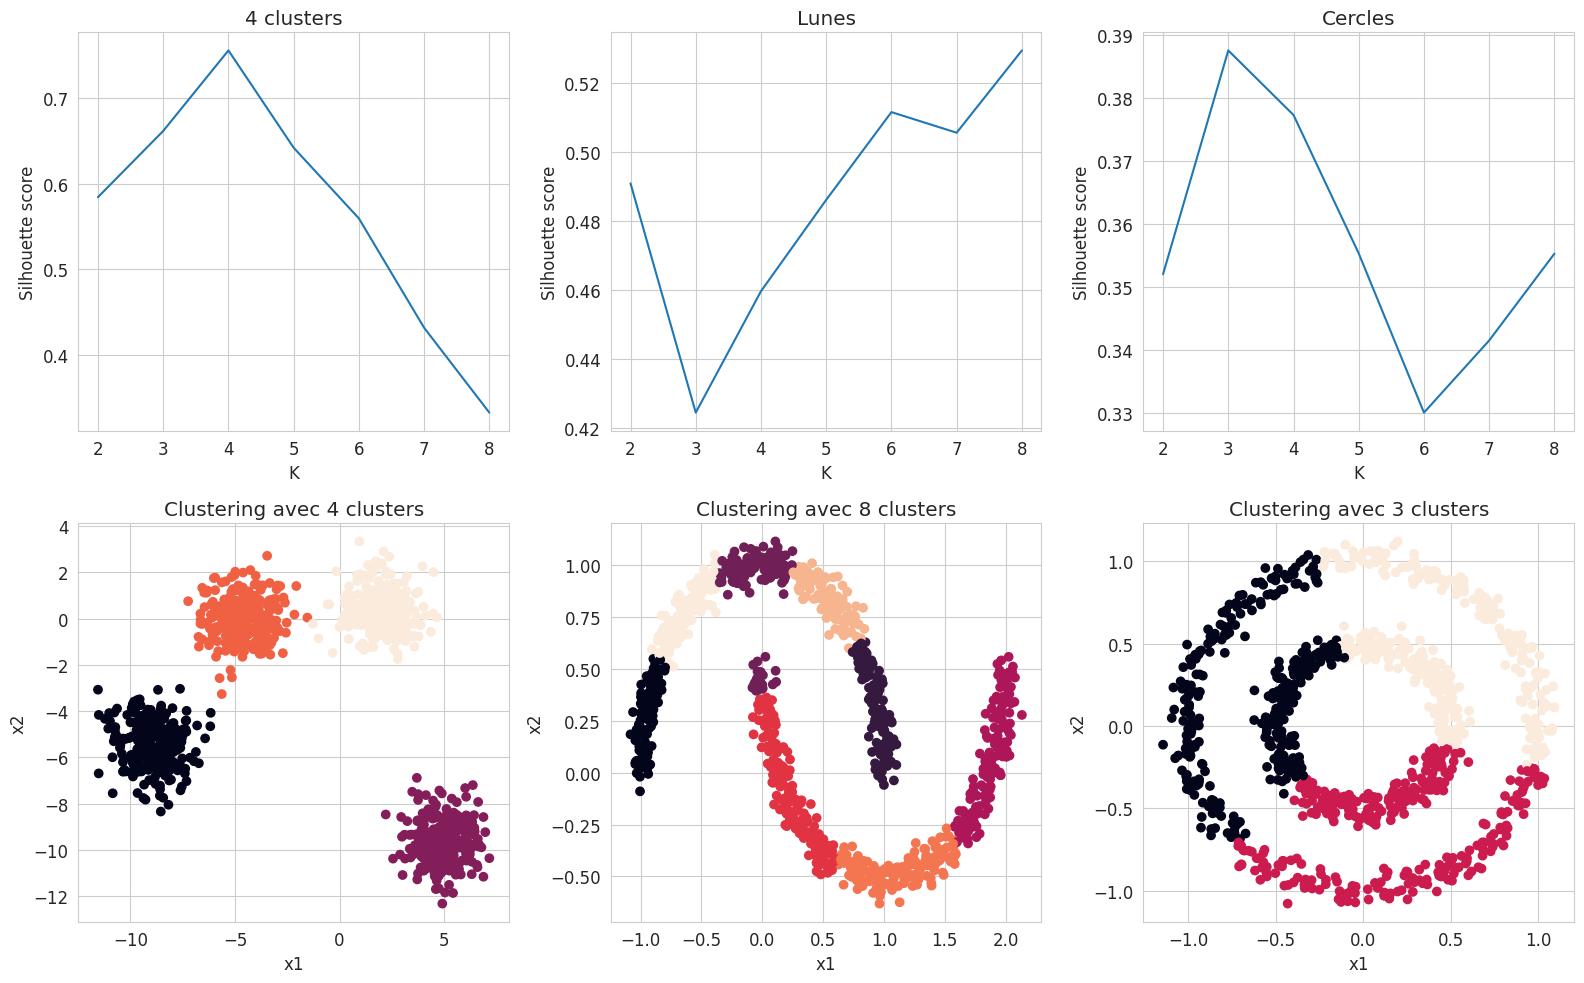

In [90]:
k_values = range(2, 9)
names = ['4 clusters', 'Lunes', 'Cercles']
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

for i, dataset in enumerate([four_blobs, moons, circles]):
    silhouettes = []

    for kval in k_values:

        ### DEBUT DE VOTRE CODE
        # Initialisez un modèle KMeans avec le nombre de clusters testé:
        kmeans_k = cluster.KMeans(n_clusters=kval)

        # Entraînez le modèle sur les données
        kmeans_k.fit(dataset)

        # Ajoutez le score de silhouette obtenu à la liste
        silhouettes.append(metrics.silhouette_score(dataset, kmeans_k.labels_))

        ### FIN DE VOTRE CODE

    # Visualisation du score de silhouette
    ax[0,i].plot(k_values, silhouettes)
    ax[0,i].set_xlabel("K")
    ax[0,i].set_ylabel("Silhouette score")
    ax[0,i].set_title(names[i])

    print("Dataset:", names[i])
    best_silhouette = np.max(silhouettes)
    print("Coefficient de Silhouette optimal : %.2f" % best_silhouette)
    best_K = k_values[silhouettes.index(best_silhouette)]
    print("Nombre de clusters K correspondant: %.0f" % best_K)


    kmeans_k = cluster.KMeans(n_clusters=best_K)
    kmeans_k.fit(dataset)
    ax[1,i].scatter(dataset[:, 0], dataset[:, 1], c=kmeans_k.labels_)
    ax[1,i].set_xlabel('x1')
    ax[1,i].set_ylabel('x2')
    ax[1,i].set_title('Clustering avec ' + str(best_K) + ' clusters')
fig.tight_layout()


**Conclusions :**
- L'algorithme des k-moyennes permet d'obtenir un clustering satisfaisant pour le dataset avec quatre blobs bien séparés, y compris sans connaître le nombre idéal de clusters à l'avance, auquel cas le coefficient de silhouette permet de retrouver ce nombre idéal.
- En revanche, malgré l'optimisation du score de silhouette, cet algorithme ne permet pas d'obtenir de bons résultats pour les autres jeux de données, que ce soit pour les deux lunes imbriquées ou les deux cercles concentriques.

Nous allons donc maintenant essayer un autre algorithme de clustering et tester la performance de celui-ci pour la comparer au k-means. Nous allons nous limiter aux deux datasets pour lesquels l'algorithme k-means ne fonctionne pas.

### DBSCAN (Clustering par densité)

L'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) fonctionne en deux temps :
- Toutes les observations suffisamment proches sont connectées entre elles.
- Les observations avec un nombre minimal de voisins connectés sont considérées comme des *core samples*, à partir desquelles les clusters sont étendues. **Toutes les observations suffisamment proche d'un *core sample* appartiennent au même cluster que celui-ci**.

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

L'algorithme DBSCAN prend en entrée deux hyperparamètres :
- `eps` : la *taille du voisinage*, autrement dit la distance entre deux points de données en-dessous de laquelle un point est considéré à l'intérieur du voisinage de l'autre.

- `min_samples` : le nombre de voisins minimum pour qu'un point de données soit considéré comme un *core sample*.

In [91]:
### DEBUT DE VOTRE CODE
# Initialisation de deux modèles DBSCAN
# avec les hyperparamètres eps=0.2, min_samples=2:
dbscan_moons = cluster.DBSCAN(eps=0.2, min_samples=2)
dbscan_circles = cluster.DBSCAN(eps=0.2, min_samples=2)

# Application aux données
dbscan_moons.fit(moons)
dbscan_circles.fit(circles)
### FIN DE VOTRE CODE


DBSCAN(eps=0.2, min_samples=2)

L'attribut `.labels_` contient, pour chaque observation, le numéro du cluster auquel cette observation est assignée.

In [92]:
print("Nombre d'étiquettes pour le dataset moons:", len(np.unique(dbscan_moons.labels_)))
print("Nombre d'étiquettes pour le dataset circles:", len(np.unique(dbscan_circles.labels_)))

Nombre d'étiquettes pour le dataset moons: 2
Nombre d'étiquettes pour le dataset circles: 2


Visualisons les clusters obtenus :

Text(0.5, 1.0, 'Clustering DBSCAN (eps=0.2)')

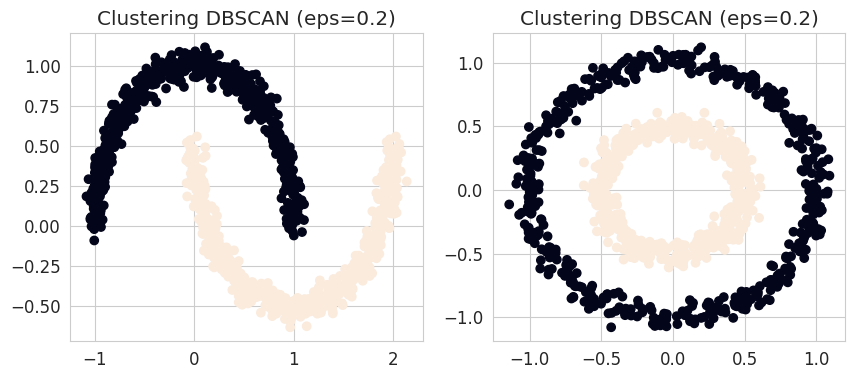

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(moons[:, 0], moons[:, 1], c=dbscan_moons.labels_)
ax[0].set_title("Clustering DBSCAN (eps=0.2)")

ax[1].scatter(circles[:, 0], circles[:, 1], c=dbscan_circles.labels_)
ax[1].set_title("Clustering DBSCAN (eps=0.2)")

On peut voir ici que l'algorithme DBSCAN est capable d'identifier les deux clusters respectifs dans les deux datasets qui posaient problème à l'algorithme k-means.

On peut noter également que nous n'avons pas eu besoin de renseigner un nombre de clusters à priori pour que l'algorithme identifie correctement le bon nombre de clusters. En revanche, l'algorithme est sensible aux deux hyperparamètre cités plus haut, ce que nous allons évaluer maintenant.

#### Rôle du paramètre de taille de voisinage (`eps`)

Nous allons évaluer l'influence du paramètre `eps` sur le jeu de données des cercles concentriques (`circles`)

In [94]:
### DEBUT DE VOTRE CODE
# Initialisation d'un clustering DBSCAN avec eps petit (ex, 0.05) et d'un autre avec eps grand (ex, 2.0):
dbscan_low = cluster.DBSCAN(eps=0.05, min_samples=2)
dbscan_high = cluster.DBSCAN(eps=2., min_samples=2)

# Application aux données
dbscan_low.fit(circles)
dbscan_high.fit(circles)
### FIN DE VOTRE CODE

DBSCAN(eps=2.0, min_samples=2)

**Question :** Quel est le nombre de clusters obtenus dans nos deux modèles ? (Utiliser l'attribut `.labels`)

In [95]:
### DEBUT DE VOTRE CODE
print(np.unique(dbscan_low.labels_))
print(np.unique(dbscan_high.labels_))
### FIN DE VOTRE CODE

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48]
[0]


Text(0.5, 1.0, 'Clustering DBSCAN (eps=0.05)')

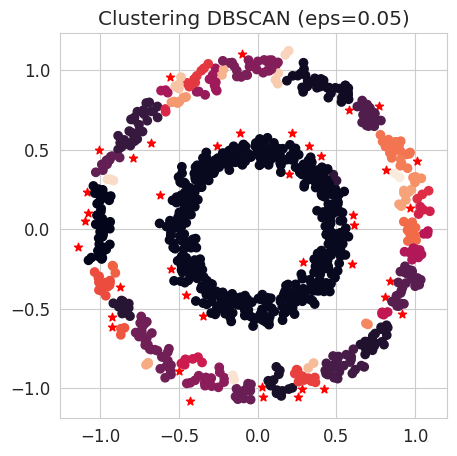

In [96]:
fig = plt.figure(figsize=(5, 5))

outliers = np.where(dbscan_low.labels_ == -1)[0]
plt.scatter(circles[outliers, 0], circles[outliers, 1], marker='*', color='red')

non_outliers = np.where(dbscan_low.labels_ != -1)[0]
plt.scatter(circles[non_outliers, 0], circles[non_outliers, 1], c=dbscan_low.labels_[non_outliers])
plt.title("Clustering DBSCAN (eps=0.05)")

Text(0.5, 1.0, 'Clustering DBSCAN (eps=2.)')

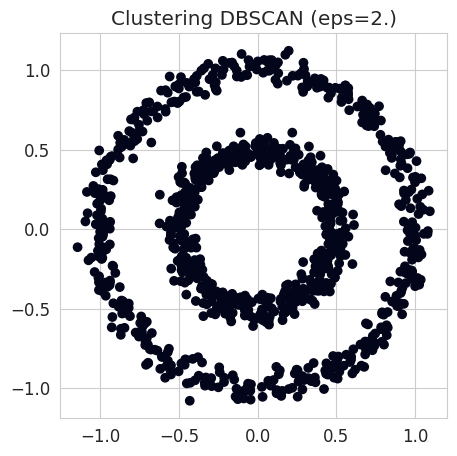

In [97]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(circles[:, 0], circles[:, 1], c=dbscan_high.labels_)
plt.title("Clustering DBSCAN (eps=2.)")

#### Trouver eps avec le coefficient de silhouette

In [98]:
print("Coefficient de silhouette pour DBSCAN (eps=0.2) : %.2f" %
      metrics.silhouette_score(circles, dbscan_circles.labels_))

Coefficient de silhouette pour DBSCAN (eps=0.2) : 0.11


In [99]:
eps_values = np.logspace(-3, 1, 40)
silhouettes = []

for eps in eps_values:
    dbscan_eps = cluster.DBSCAN(eps=eps, min_samples=2)
    dbscan_eps.fit(circles)
    if len(np.unique(dbscan_eps.labels_)) > 1: # nécessaire pour calculer le coeff de silhouette
        silhouettes.append(metrics.silhouette_score(circles, dbscan_eps.labels_))
    else:
        silhouettes.append(-1)

Text(0, 0.5, 'silhouette')

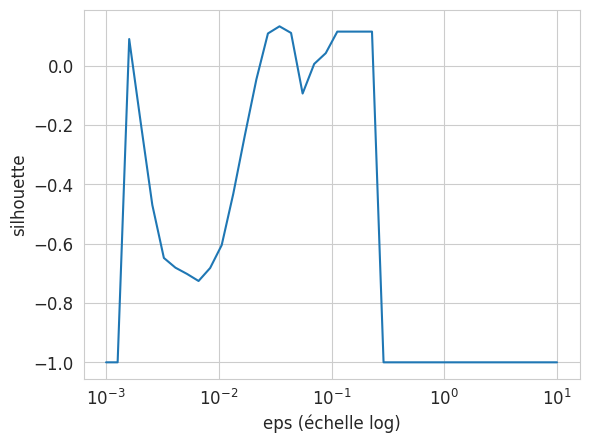

In [100]:
plt.plot(eps_values, silhouettes)
plt.xscale("log")
plt.xlabel("eps (échelle log)")
plt.ylabel("silhouette")

In [101]:
best_silhouette = np.max(silhouettes)
print("Coefficient de silhouette optimal : %.2f" % best_silhouette)
print("Eps correspondant : %.2f" % eps_values[silhouettes.index(best_silhouette)])

Coefficient de silhouette optimal : 0.13
Eps correspondant : 0.03


Voyons ce que donne le clustering obtenu en utilisant le paramètre `eps` avec lequel on obtient le meilleur coefficient de silhouette :

Text(0.5, 1.0, 'Clustering DBSCAN (eps=0.03)')

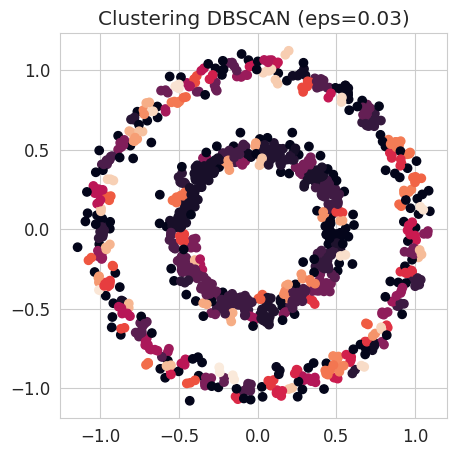

In [102]:
best_eps = eps_values[silhouettes.index(best_silhouette)]

dbscan_best = cluster.DBSCAN(eps=best_eps, min_samples=2)
dbscan_best.fit(circles)

fig = plt.figure(figsize=(5, 5))
plt.scatter(circles[:, 0], circles[:, 1], c=dbscan_best.labels_)
plt.title("Clustering DBSCAN (eps=%.2f)" % best_eps)

**Question :**  Quel est le problème ici ? Le coefficient de silhouette est-il adapté à notre dataset ?

### Index de Rand ajusté

L'index de Rand ajusté permet de **comparer un résultat de clustering avec des étiquettes**. Pour chaque paire d'observations nous regardons si elles se situent dans le même cluster ou non, dans le clustering prédit et réel. L'index prend des valeurs entre 0 (clustering aléatoire) et 1 (clustering parfait).

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

__Question :__ Pourquoi ne pas utiliser une métrique d'évaluation de modèle de classification ici ?

In [103]:
print("Index de Rand ajusté du K-means (K=2) : %.2f" % metrics.adjusted_rand_score(circles_labels, kmeans_circles.labels_))

Index de Rand ajusté du K-means (K=2) : -0.00


In [104]:
print("Index de Rand ajusté de dbscan (eps=0.2) : %.2f" % metrics.adjusted_rand_score(circles_labels, dbscan_circles.labels_))

Index de Rand ajusté de dbscan (eps=0.2) : 1.00


## Bonus: Clustering sur les Manchots

Le but est ici de tester plusieurs méthodes non-supervisées de clustering sur un nouveau dataset, et de les comparer. Essayez les méthodes vues plus haut telles que [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) ou [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Vous pouvez aussi essayer d'autres méthodes telles que le mélange de Gaussiennes ([sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)).

Quelles méthodes devraient mieux fonctionner selon vous ? Pourquoi ?

Le jeu de données que nous vous proposons d'utiliser ici concerne différentes espèces de manchots et certaines caractéristiques physiques. Les 3 espèces sont : les manchots Adélie, les manchots papou (gentoo) et les manchots à jugulaire (chinstrap).

In [105]:
palmerpenguins = pd.read_csv("data/penguins_data.csv")
palmerpenguins.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/penguins_data.csv'

__Alternativement :__ Si vous avez besoin de télécharger le fichier (par exemple sur colab), décommentez les deux lignes suivantes :

In [106]:
!wget https://raw.githubusercontent.com/CBIO-mines/fml-dassault-systems/main/data/penguins_data.csv

palmerpenguins = pd.read_csv("penguins_data.csv")

--2026-02-05 09:34:17--  https://raw.githubusercontent.com/CBIO-mines/fml-dassault-systems/main/data/penguins_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27561 (27K) [text/plain]
Saving to: ‘penguins_data.csv’

penguins_data.csv   100%[===================>]  26.92K  --.-KB/s    in 0s      

2026-02-05 09:34:17 (152 MB/s) - ‘penguins_data.csv’ saved [27561/27561]



La première étape est de filtrer certaines données pour éviter les données manquantes (NA ou NaN).

In [107]:
palmerpenguins = palmerpenguins[palmerpenguins['bill_depth_mm'].notna()]
palmerpenguins = palmerpenguins.reset_index(drop=True)

On va se concentrer ici uniquement sur deux caractéristiques de nos manchots : la longueur du bec et leur poids

In [108]:
penguins_X = np.array(palmerpenguins[["bill_length_mm", "body_mass_g"]])

In [109]:
from sklearn import preprocessing

Nos deux variables ne sont pas du tout à la même échelle, comme on peut le voir dans les données affichées plus haut. Il faut donc standardiser nos données.

In [110]:
# standardisation (centrer-réduire)
penguins_X = preprocessing.StandardScaler().fit_transform(penguins_X)

In [111]:
species_names, species_int = np.unique(palmerpenguins.species, return_inverse=True)
penguins_labels = species_int
species_names

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

Essayons d'abord de visualiser nos données sur un graphique :

Text(0, 0.5, 'body_mass_g (centrée-réduite)')

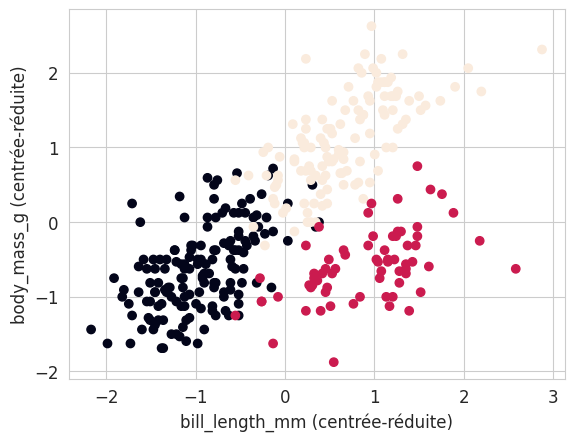

In [112]:
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels)
plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

A vous maintenant de tester différents algorithmes de clustering sur ces données, et d'en évaluer les performances. Pourrez-vous obtenir un clustering parfait ?

En plus des algorithmes de clustering utilisés ci-dessus, vous pouvez essayer le mélange de Gaussiennes ([GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)) par exemple, ou d'autres méthodes des modules `cluster` ou `mixture`.
Donnez pour chacun les coefficients de silhouette et indices de Rand ajusté que vous obtenez, ainsi qu'une visualisation du clustering obtenu.

### KMeans

In [113]:
# initialisation d'un k-means avec k=3
kmeans = cluster.KMeans(n_clusters=3)

# application aux données
kmeans.fit(penguins_X)

KMeans(n_clusters=3)

In [ ]:
# plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=kmeans.labels_, marker='*')


plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

In [ ]:
print("Coefficient de silhouette pour le k-means (k=3) : %.2f" % metrics.silhouette_score(penguins_X, kmeans.labels_))

In [ ]:
print("Index de Rand ajusté du K-means (K=3) : %.2f" % metrics.adjusted_rand_score(penguins_labels, kmeans.labels_))

### DBSCAN

In [ ]:
eps_values = np.logspace(-3, 1, 40)
silhouettes = []

for eps in eps_values:
    dbscan_eps = cluster.DBSCAN(eps=eps, min_samples=2)
    dbscan_eps.fit(penguins_X)
    if len(np.unique(dbscan_eps.labels_)) > 1: # nécessaire pour calculer le coeff de silhouette
        silhouettes.append(metrics.silhouette_score(penguins_X, dbscan_eps.labels_))
    else:
        silhouettes.append(-1)

In [ ]:
plt.plot(eps_values, silhouettes)
plt.xscale("log")
plt.xlabel("eps (échelle log)")
plt.ylabel("silhouette")

In [ ]:
best_silhouette = np.max(silhouettes)
print("Coefficient de silhouette optimal : %.2f" % best_silhouette)
best_eps = eps_values[silhouettes.index(best_silhouette)]
print("Eps correspondant : %.2f" % best_eps)

In [ ]:
dbscan_opt = cluster.DBSCAN(eps=best_eps, min_samples=2)
dbscan_opt.fit(penguins_X)

In [ ]:
np.unique(dbscan_opt.labels_)

In [ ]:
print("Index de Rand ajusté de DBSCAN : %.2f" % metrics.adjusted_rand_score(penguins_labels, dbscan_opt.labels_))

In [ ]:
#plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=dbscan_opt.labels_, marker='*')


plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

### Modèle de mélange gaussien

Le modèle de mélange de gaussiennes cherche à **optimiser les paramètres d'un nombre fini de gaussiennes** aux données.

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [ ]:
from sklearn import mixture

In [ ]:
# initialisation d'un k-means avec k=3
gmm = mixture.GaussianMixture(n_components=3)

# application aux données
gmm.fit(penguins_X)

# prédiction des clusters
gmm_labels = gmm.predict(penguins_X)

In [ ]:
#plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=penguins_labels, marker='o')
plt.scatter(penguins_X[:, 0], penguins_X[:, 1], c=gmm_labels, marker='*')


plt.xlabel("bill_length_mm (centrée-réduite)")
plt.ylabel("body_mass_g (centrée-réduite)")

In [ ]:
print("Coefficient de silhouette pour le GMM (k=3) : %.2f" % metrics.silhouette_score(penguins_X, gmm_labels))

In [ ]:
print("Index de Rand ajusté du GMM (K=3) : %.2f" % metrics.adjusted_rand_score(penguins_labels, gmm_labels))

## Conclusion

Nous sommes arrivés à la fin de ce notebook, qui a exploré plusieurs techniques d'apprentissage non-supervisé. Voici un résumé de ce que nous avons couvert, avec les points clés :

-   **Analyse en Composantes Principales (ACP)** : Nous avons utilisé l'ACP pour la réduction de dimension, en transformant des données multidimensionnelles en un ensemble de nouvelles variables (composantes principales) qui capturent la majeure partie de la variance. Nous avons appliqué l'ACP aux données du décathlon pour visualiser les athlètes et aux images de visages d'Olivetti. Nous avons également examiné la proportion de variance expliquée et l'interprétation des composantes.

-   **t-Distributed Stochastic Neighbor Embedding (t-SNE)** : Pour une réduction de dimension non-linéaire et une meilleure visualisation des données complexes, nous avons utilisé t-SNE sur les images de visages d'Olivetti. Nous avons constaté l'importance du paramètre de perplexité pour préserver la structure locale et globale des données.

-   **Clustering K-Means** : Nous avons implémenté et utilisé l'algorithme K-Means pour partitionner les données en `K` clusters. Nous avons vu que K-Means est efficace pour les clusters sphériques bien séparés (comme les 'blobs'), mais qu'il rencontre des difficultés avec des formes plus complexes (comme les 'lunes' ou les 'cercles concentriques'). L'objectif est de minimiser la variance intra-cluster.

-   **DBSCAN (Clustering par densité)** : Cet algorithme a été introduit comme alternative au K-Means pour gérer des clusters de formes arbitraires et détecter les valeurs aberrantes. DBSCAN fonctionne en regroupant les points de données qui sont proches les uns des autres et en identifiant les 'core samples'. Nous avons démontré son efficacité sur les données en forme de 'lunes' et de 'cercles concentriques' où K-Means échouait. Ses hyperparamètres clés sont `eps` (rayon de voisinage) et `min_samples` (nombre minimum de voisins).

-   **Évaluation des algorithmes de clustering** :
    -   **Coefficient de silhouette** : Nous avons utilisé le coefficient de silhouette pour évaluer la qualité d'un clustering et aider à déterminer le nombre optimal de clusters (`K`) lorsque la vérité terrain n'est pas connue. Il mesure la similarité d'un objet à son propre cluster par rapport à d'autres clusters.
    -   **Index de Rand ajusté** : Lorsque des étiquettes de vérité terrain sont disponibles, l'index de Rand ajusté permet de comparer la similarité entre les clusters prédits et les vraies classes, avec des valeurs allant de 0 (clustering aléatoire) à 1 (clustering parfait).

Enfin, dans la section Bonus, nous avons appliqué ces techniques, ainsi que le mélange de gaussiennes (GaussianMixture), à un nouveau jeu de données sur les manchots pour comparer leurs performances dans un contexte différent.